In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import missingno as msno
import networkx as nx
from networkx import Graph

# **1. Eksplorasi Dataset dan Analisis Data Awal (EDA)**

In [ ]:
# train = pd.read_csv('C:/Users/Kayla/Downloads/home-credit-default-risk/application_train.csv')
# test = pd.read_csv('C:/Users/Kayla/Downloads/home-credit-default-risk/application_test.csv')
# df_installments_payments = pd.read_csv('C:/Users/Kayla/Downloads/home-credit-default-risk/installments_payments.csv')

In [ ]:
train = pd.read_csv('C:/Users/TUF A15/Downloads/home-credit-default-risk/application_train.csv')
test = pd.read_csv('C:/Users/TUF A15/Downloads/home-credit-default-risk/application_test.csv')
df_installments_payments = pd.read_csv('C:/Users/TUF A15/Downloads/home-credit-default-risk/installments_payments.csv')

In [ ]:
# train = pd.read_csv('/content/application_train.csv')
# test = pd.read_csv('/content/application_test.csv')
# df_installments_payments = pd.read_csv('/content/installments_payments.csv')

In [ ]:
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Struktur Dataset

In [ ]:
print('--- Struktur Dataset ---\n')
print(train.info())
print(train.describe().T)

--- Struktur Dataset ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
                               count           mean            std       min  \
SK_ID_CURR                  307511.0  278180.518577  102790.175348  100002.0   
TARGET                      307511.0       0.080729       0.272419       0.0   
CNT_CHILDREN                307511.0       0.417052       0.722121       0.0   
AMT_INCOME_TOTAL            307511.0  168797.919297  237123.146279   25650.0   
AMT_CREDIT                  307511.0  599025.999706  402490.776996   45000.0   
...                              ...            ...            ...       ...   
AMT_REQ_CREDIT_BUREAU_DAY   265992.0       0.007000       0.110757       0.0   
AMT_REQ_CREDIT_BUREAU_WEEK  265992.0       0.034362       0.204685       0.0   
AMT_REQ_CREDIT_BUREAU_MON   265992.0     

Dataset Home Credit Default Risk memiliki 307.511 entri dan 122 kolom dengan tipe data yang bervariasi, termasuk 65 kolom bertipe float64, 41 kolom bertipe int64, dan 16 kolom bertipe object. Memori yang digunakan sebesar 286,2+ MB.  

Beberapa insight awal dari statistik deskriptif:  
- **Kolom TARGET** menunjukkan bahwa 8,07% dari total entri menandakan kegagalan pembayaran.  
- **CNT_CHILDREN** memiliki rata-rata 0,42 dengan nilai maksimum 19, menunjukkan beberapa debitur memiliki jumlah anak yang sangat tinggi.  
- **AMT_INCOME_TOTAL** memiliki rata-rata Rp168.797.919, namun terdapat outlier dengan nilai maksimum Rp117.000.000.000.  
- **AMT_CREDIT** memiliki distribusi yang lebar dengan median Rp513.531.000 dan maksimum Rp4.050.000.000.  

Adanya perbedaan yang signifikan antara rata-rata dan nilai maksimum pada beberapa kolom menunjukkan kemungkinan keberadaan outlier yang perlu dianalisis lebih lanjut. Silakan lanjutkan dengan hasil kode berikutnya.

In [ ]:
data_types = train.dtypes.reset_index()
data_types.columns = ['Nama Kolom', 'Tipe Data']
print(data_types)

                     Nama Kolom Tipe Data
0                    SK_ID_CURR     int64
1                        TARGET     int64
2            NAME_CONTRACT_TYPE    object
3                   CODE_GENDER    object
4                  FLAG_OWN_CAR    object
..                          ...       ...
117   AMT_REQ_CREDIT_BUREAU_DAY   float64
118  AMT_REQ_CREDIT_BUREAU_WEEK   float64
119   AMT_REQ_CREDIT_BUREAU_MON   float64
120   AMT_REQ_CREDIT_BUREAU_QRT   float64
121  AMT_REQ_CREDIT_BUREAU_YEAR   float64

[122 rows x 2 columns]


Dataset ini memiliki total 122 kolom dengan tipe data yang bervariasi, termasuk int64, float64, dan object.  
- **Kolom numerik** mendominasi dataset, dengan banyak variabel keuangan dan statistik.  
- **Kolom kategorikal**, seperti NAME_CONTRACT_TYPE, CODE_GENDER, dan FLAG_OWN_CAR, menyimpan informasi demografis dan status kontrak.  

Informasi ini penting untuk menentukan metode pra-pemrosesan data, seperti encoding untuk kolom kategorikal dan penanganan missing values pada kolom numerik. Silakan lanjutkan dengan hasil berikutnya.

In [ ]:
missing_values = train.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(train)) * 100
missing_df = pd.DataFrame({'Jumlah Missing': missing_values, 'Persentase': missing_percentage})
print(missing_df.head(10))

                          Jumlah Missing  Persentase
COMMONAREA_AVG                    214865   69.872297
COMMONAREA_MODE                   214865   69.872297
COMMONAREA_MEDI                   214865   69.872297
NONLIVINGAPARTMENTS_MEDI          213514   69.432963
NONLIVINGAPARTMENTS_MODE          213514   69.432963
NONLIVINGAPARTMENTS_AVG           213514   69.432963
FONDKAPREMONT_MODE                210295   68.386172
LIVINGAPARTMENTS_AVG              210199   68.354953
LIVINGAPARTMENTS_MEDI             210199   68.354953
LIVINGAPARTMENTS_MODE             210199   68.354953


**ANALISIS MISSING VALUE**

Beberapa kolom dengan persentase nilai hilang (missing values) yang tinggi di antaranya:

- **COMMONAREA_AVG, COMMONAREA_MODE, dan COMMONAREA_MEDI** memiliki 69,87% nilai hilang.

- **NONLIVINGAPARTMENTS_AVG, NONLIVINGAPARTMENTS_MODE, dan NONLIVINGAPARTMENTS_MEDI** memiliki 69,43% nilai hilang.

- **FONDKAPREMONT_MODE** memiliki 68,39% nilai hilang.


Persentase missing values yang tinggi ini menunjukkan perlunya pendekatan khusus, seperti imputasi data, penghapusan kolom yang tidak signifikan, atau teknik modeling yang tahan terhadap missing values. Silakan lanjutkan dengan hasil berikutnya.

# Analisis Deskriptif Numerik dan Kategorikal

In [ ]:
print('--- Statistik Deskriptif Numerik ---\n')
print(train.describe().T)

--- Statistik Deskriptif Numerik ---

                               count           mean            std       min  \
SK_ID_CURR                  307511.0  278180.518577  102790.175348  100002.0   
TARGET                      307511.0       0.080729       0.272419       0.0   
CNT_CHILDREN                307511.0       0.417052       0.722121       0.0   
AMT_INCOME_TOTAL            307511.0  168797.919297  237123.146279   25650.0   
AMT_CREDIT                  307511.0  599025.999706  402490.776996   45000.0   
...                              ...            ...            ...       ...   
AMT_REQ_CREDIT_BUREAU_DAY   265992.0       0.007000       0.110757       0.0   
AMT_REQ_CREDIT_BUREAU_WEEK  265992.0       0.034362       0.204685       0.0   
AMT_REQ_CREDIT_BUREAU_MON   265992.0       0.267395       0.916002       0.0   
AMT_REQ_CREDIT_BUREAU_QRT   265992.0       0.265474       0.794056       0.0   
AMT_REQ_CREDIT_BUREAU_YEAR  265992.0       1.899974       1.869295       0.0   

 



 **ANALISIS DESKRIPTIF NUMERIK**




Analisis deskriptif numerik memberikan gambaran menyeluruh tentang distribusi data dan mengidentifikasi potensi masalah yang perlu diperhatikan. Berikut adalah beberapa poin utama yang ditemukan:

  - Kolom **TARGET** menunjukkan bahwa 8,07% dari total observasi merepresentasikan kasus gagal bayar. Proporsi yang rendah ini mengindikasikan ketidakseimbangan data (imbalanced dataset) yang signifikan.

  - **AMT_INCOME_TOTAL** memiliki nilai rata-rata sebesar Rp168.797.919 dengan nilai maksimum mencapai Rp117.000.000.000, menunjukkan adanya outlier ekstrem yang berpotensi memengaruhi analisis statistik dan model prediktif.

  - **CNT_CHILDREN** memiliki median sebesar 0 dengan nilai maksimum 19, menandakan bahwa mayoritas klien tidak memiliki anak, sementara terdapat beberapa entri dengan jumlah anak yang sangat tinggi.

  - **AMT_CREDIT** menunjukkan median sebesar Rp513.531.000 dengan nilai maksimum Rp4.050.000.000, yang mencerminkan dispersi data yang tinggi, mengindikasikan perbedaan yang signifikan dalam jumlah kredit yang diajukan antar klien.

hasil ini mengindikasikan perlunya perhatian terhadap ketidakseimbangan data, outlier yang ekstrem, dan variabilitas data yang tinggi untuk memastikan analisis dan model prediksi yang lebih akurat.


In [ ]:
print('--- Statistik Deskriptif Kategorikal ---\n')
categorical_cols = train.select_dtypes(include=['object']).columns
print(train[categorical_cols].describe().T)


--- Statistik Deskriptif Kategorikal ---

                             count unique                            top  \
NAME_CONTRACT_TYPE          307511      2                     Cash loans   
CODE_GENDER                 307511      3                              F   
FLAG_OWN_CAR                307511      2                              N   
FLAG_OWN_REALTY             307511      2                              Y   
NAME_TYPE_SUITE             306219      7                  Unaccompanied   
NAME_INCOME_TYPE            307511      8                        Working   
NAME_EDUCATION_TYPE         307511      5  Secondary / secondary special   
NAME_FAMILY_STATUS          307511      6                        Married   
NAME_HOUSING_TYPE           307511      6              House / apartment   
OCCUPATION_TYPE             211120     18                       Laborers   
WEEKDAY_APPR_PROCESS_START  307511      7                        TUESDAY   
ORGANIZATION_TYPE           307511     58     

**ANALISIS DESKRIPTIF KATEGORIKAL**

Analisis deskriptif kategorikal memberikan wawasan tentang karakteristik demografis dan sosial-ekonomi client dalam dataset. Beberapa hal yang dapat diperoleh dari analisis ini:

- **Profil Demografis**: Mayoritas client adalah perempuan yang tidak memiliki mobil tetapi memiliki properti. Hal ini bisa menjadi indikasi bahwa kepemilikan properti lebih umum dibandingkan kepemilikan kendaraan.

- **Status Sosial dan Ekonomi**: Sebagian besar client memiliki pendidikan menengah dan berstatus menikah. Ini menunjukkan bahwa kelompok dengan profil ini lebih cenderung mengajukan kredit.

- **Pekerjaan dan Organisasi**: Pekerja kasar (Laborers) adalah jenis pekerjaan terbanyak, menunjukkan bahwa individu dari sektor ini memiliki kebutuhan pembiayaan yang tinggi.

- **Kebiasaan Aplikasi**: Pengajuan kredit paling sering dilakukan pada hari Selasa, yang bisa menunjukkan pola operasional atau preferensi tertentu.

- **Jenis Kredit**: Cash loans mendominasi jenis kontrak yang diajukan, menandakan tingginya kebutuhan likuiditas jangka pendek.

Secara keseluruhan, analisis kategorikal membantu dalam memahami profil client dan pola pengajuan kredit, yang dapat berguna dalam segmentasi pelanggan, penyesuaian strategi pemasaran, dan manajemen risiko kredit.

# Visualisasi Missing Values



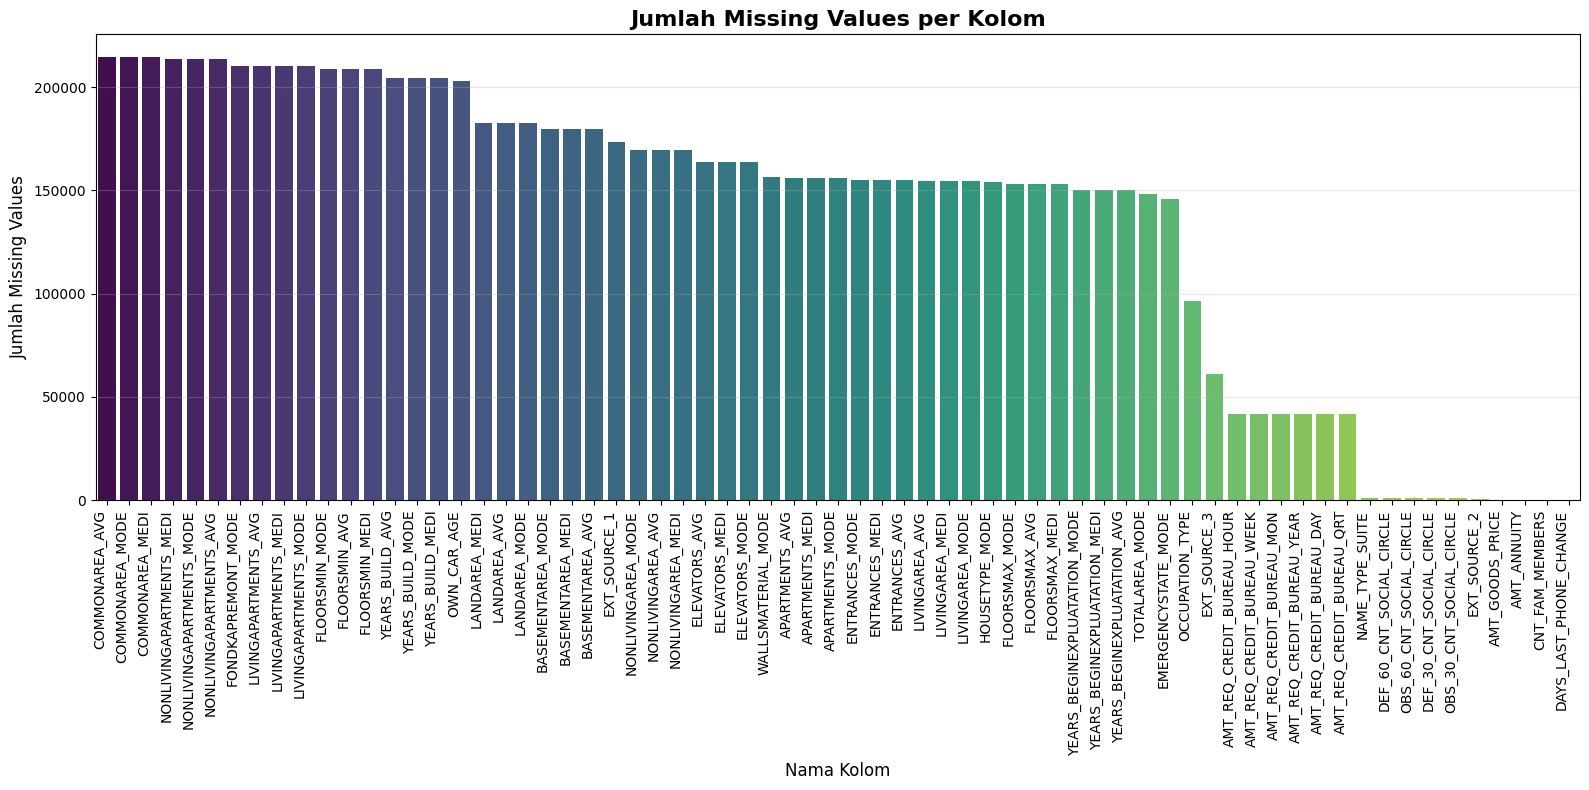

In [ ]:
missing_values = train.isnull().sum()
missing_percentage = (missing_values / len(train)) * 100

missing_df = pd.DataFrame({
    'Jumlah Missing': missing_values,
    'Persentase Missing': missing_percentage
}).sort_values(by='Jumlah Missing', ascending=False)

missing_df = missing_df[missing_df['Jumlah Missing'] > 0]

plt.figure(figsize=(16, 8))
sns.barplot(x=missing_df.index, y=missing_df['Jumlah Missing'],  hue=missing_df.index, palette='viridis', legend=False)

plt.title('Jumlah Missing Values per Kolom', fontsize=16, fontweight='bold')
plt.xlabel('Nama Kolom', fontsize=12)
plt.ylabel('Jumlah Missing Values', fontsize=12)
plt.xticks(rotation=90, ha='right')

plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


Berdasarkan visualisasi jumlah missing values per kolom, dapat disimpulkan :

- **Banyak Kolom dengan Missing Values Tinggi:** Beberapa kolom memiliki jumlah missing values yang sangat tinggi, bahkan melebihi 200.000 entri. Ini menunjukkan bahwa data yang hilang cukup signifikan di sejumlah fitur.

- **Distribusi yang Bervariasi:** Tidak semua kolom memiliki tingkat missing values yang sama; beberapa kolom terlihat lebih lengkap dengan jumlah missing values yang relatif rendah.

- **Potensi Dampak pada Analisis:** Kolom dengan missing values yang tinggi berpotensi memengaruhi hasil analisis dan kinerja model prediksi. Oleh karena itu, diperlukan strategi penanganan yang sesuai, seperti imputasi atau penghapusan kolom tertentu jika dianggap tidak relevan.

# Visualisasi Variabel Target

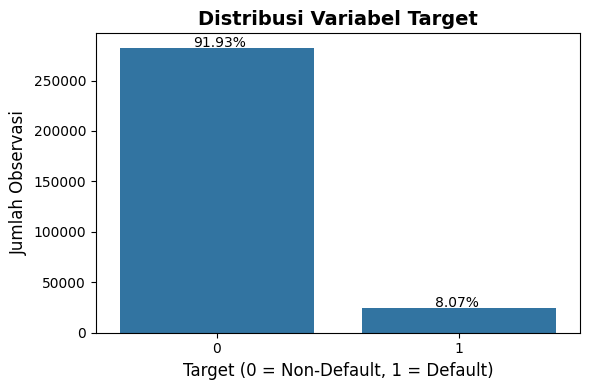

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='TARGET', data=train)
total = len(train)
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    plt.gca().annotate(percentage, (p.get_x() + 0.3, p.get_height() + 500))
plt.title('Distribusi Variabel Target', fontsize=14, fontweight='bold')
plt.xlabel('Target (0 = Non-Default, 1 = Default)', fontsize=12)
plt.ylabel('Jumlah Observasi', fontsize=12)
plt.tight_layout()
plt.show()


hasil visualisasi Distribusi Variabel Target. Grafik ini menunjukkan bahwa:

- 91.93% data adalah Non-Default (0) — artinya, mayoritas klien mampu membayar pinjaman tepat waktu.

- 8.07% data adalah Default (1) — artinya, hanya sebagian kecil klien yang gagal membayar.

# Fitur Numerik

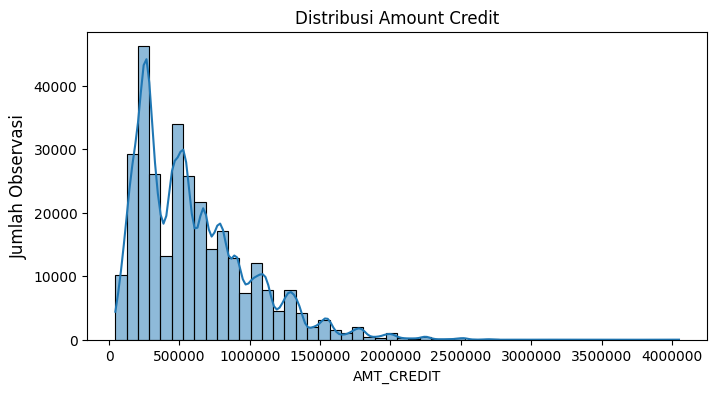

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(train['AMT_CREDIT'], bins=50, kde=True)
plt.title('Distribusi Amount Credit')
plt.ylabel('Jumlah Observasi', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.show()


Berdasarkan visualisasi distribusi Amount Credit, ada beberapa informasi yang bisa kita peroleh yaitu:

- Mayoritas jumlah kredit yang diberikan berada di sekitar 0 hingga 500.000 (dalam satuan mata uang yang tidak disebutkan).

- Distribusi cenderung right-skewed (condong ke kanan), artinya sebagian besar kredit bernilai kecil hingga sedang, sementara jumlah kredit yang sangat besar relatif jarang.

- Pola ini umum dalam pembiayaan, di mana lebih banyak orang mengambil pinjaman kecil daripada pinjaman besar.

Analisis ini penting karena membantu memahami pola pemberian kredit dan mendeteksi potensi outlier

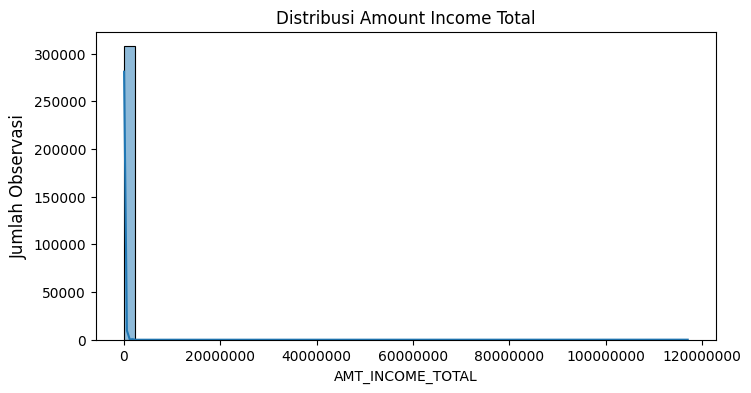

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(train['AMT_INCOME_TOTAL'], bins=50, kde=True)
plt.title('Distribusi Amount Income Total')
plt.ylabel('Jumlah Observasi', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.show()


Grafik ini menunjukkan distribusi jumlah kredit yang diajukan (AMT_CREDIT). Dari histogram tersebut, mayoritas data terkonsentrasi di bawah 1 juta dengan pola distribusi yang miring ke kanan (right-skewed). Artinya, sebagian besar pemohon mengajukan kredit dalam jumlah yang relatif kecil, sementara sedikit dari mereka mengajukan kredit dalam jumlah besar. Ini bisa menunjukkan bahwa populasi utama dalam dataset ini adalah individu dengan kebutuhan kredit yang relatif rendah.

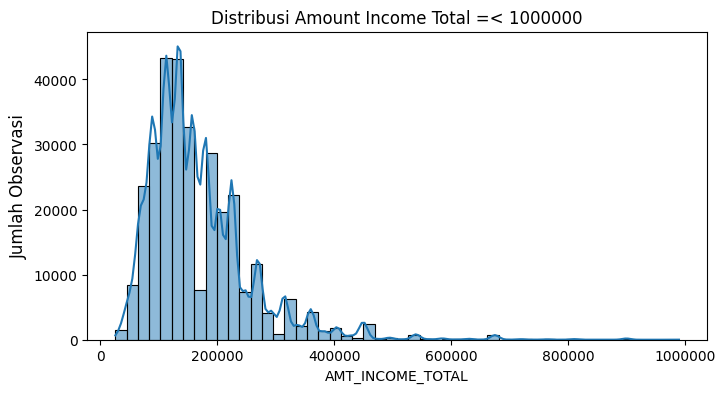

In [ ]:
filtered_df = train[train['AMT_INCOME_TOTAL'] < 1000000]
plt.figure(figsize=(8, 4))
sns.histplot(filtered_df['AMT_INCOME_TOTAL'], bins=50, kde=True)
plt.title('Distribusi Amount Income Total =< 1000000')
plt.ylabel('Jumlah Observasi', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

Namun, pada distribusi total pendapatan (AMT_INCOME_TOTAL) yang kedua ini, terdapat perbedaan pola. Histogram awal menunjukkan adanya outlier dengan jumlah pendapatan yang sangat tinggi, membuat data utama terlihat sangat terkonsentrasi di ujung kiri grafik. Setelah dilakukan filtering untuk hanya menampilkan data dengan pendapatan di bawah 1 juta, distribusi menjadi lebih jelas dan terlihat mirip dengan distribusi normal yang miring ke kanan. Ini menunjukkan bahwa sebagian besar individu dalam dataset memiliki pendapatan total tahunan di bawah 500.000, dengan beberapa individu yang berpenghasilan lebih tinggi.

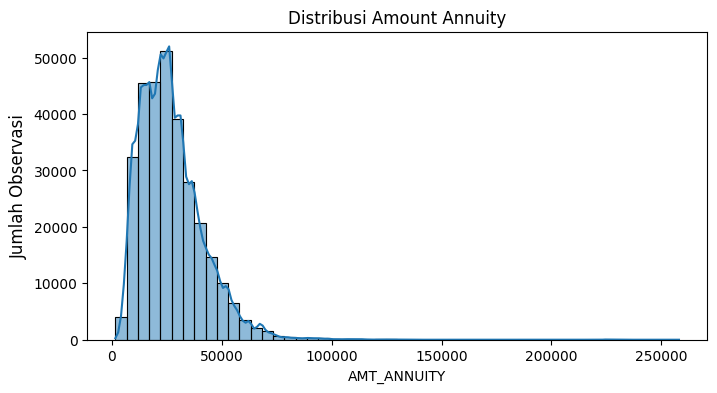

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(train['AMT_ANNUITY'], bins=50, kde=True)
plt.title('Distribusi Amount Annuity')
plt.ylabel('Jumlah Observasi', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

Distribusi "AMT_ANNUITY" (jumlah cicilan tahunan) menunjukkan bahwa sebagian besar observasi terkonsentrasi di rentang 20.000 hingga 50.000. Grafik ini memiliki distribusi yang miring ke kanan (right-skewed), dengan beberapa outlier yang mencapai lebih dari 200.000.



Dari output ini, kita dapat menyimpulkan bahwa mayoritas peminjam memiliki jumlah cicilan tahunan yang relatif kecil hingga sedang, sementara hanya sedikit yang memiliki cicilan sangat besar. Pola ini bisa menunjukkan bahwa sebagian besar pemohon kredit berasal dari segmen ekonomi menengah ke bawah. Outlier yang ditemukan mungkin memerlukan analisis lebih lanjut untuk memahami apakah mereka merupakan kasus khusus atau data anomali.

# Fitur Kategorikal

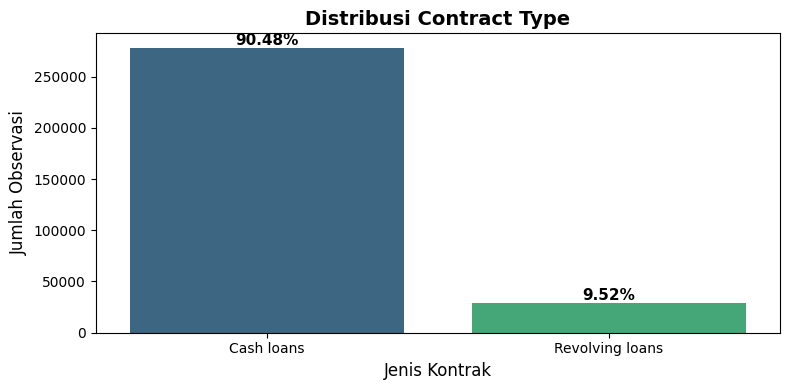

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='NAME_CONTRACT_TYPE', data=train, palette='viridis', hue = 'NAME_CONTRACT_TYPE',  legend=False)

total = len(train)

for p in plt.gca().patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    plt.gca().annotate(percentage, (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Distribusi Contract Type', fontsize=14, fontweight='bold')
plt.xlabel('Jenis Kontrak', fontsize=12)
plt.ylabel('Jumlah Observasi', fontsize=12)
plt.tight_layout()
plt.show()

Dari grafik "Distribusi Contract Type" ini, Mayoritas besar kontrak adalah **Cash Loans (90.48%)**, sementara hanya **9.52%** yang merupakan **Revolving Loans**.

- **Cash Loans:** Jenis kontrak ini mendominasi dataset, menunjukkan bahwa kebanyakan peminjam lebih memilih pinjaman tunai yang biasanya memiliki jumlah yang tetap dengan periode pembayaran tertentu.

- **Revolving Loans:** Proporsi yang jauh lebih kecil, yang biasanya merupakan pinjaman dengan batas kredit yang bisa digunakan kembali setelah pembayaran cicilan.

Distribusi yang tidak merata ini menunjukkan bahwa lembaga keuangan lebih sering memberikan pinjaman tunai dibandingkan kredit bergulir. Analisis lebih lanjut mungkin diperlukan untuk memahami mengapa revolving loans lebih jarang diambil — apakah karena kebijakan, preferensi konsumen, atau kriteria kelayakan yang lebih ketat.

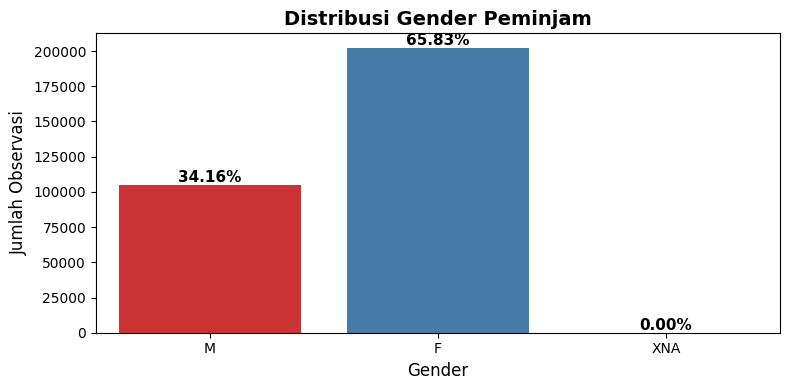

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='CODE_GENDER', data=train, palette='Set1', hue='CODE_GENDER', legend=False)

total = len(train)

for p in plt.gca().patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    plt.gca().annotate(percentage, (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Distribusi Gender Peminjam', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Jumlah Observasi', fontsize=12)
plt.tight_layout()
plt.show()

Diagram ini menggambarkan perbandingan jumlah peminjam berdasarkan jenis kelamin. Sebanyak **65,83%** dari total peminjam merupakan **perempuan (F)**, sedangkan **34,16%** merupakan **laki-laki (M)**. Hampir tidak ada data dengan kategori **'XNA'**, menandakan data jenis kelamin yang tidak teridentifikasi.

Analisis ini menunjukkan bahwa perempuan lebih banyak mengajukan pinjaman dibandingkan laki-laki dalam dataset ini. Ini bisa mencerminkan peran ekonomi yang lebih signifikan dari perempuan dalam populasi yang dikaji, atau mungkin ada faktor sosial-ekonomi lain yang memengaruhi pola ini. Analisis tambahan bisa membantu memahami motivasi dan kebutuhan yang berbeda antara kedua gender.

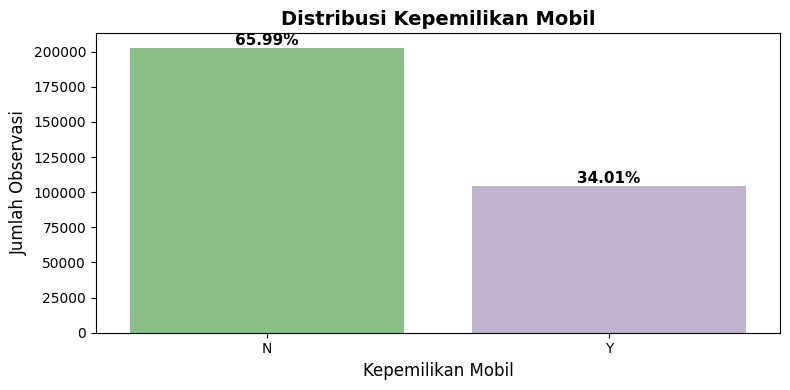

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='FLAG_OWN_CAR', data=train, palette='Accent', hue='FLAG_OWN_CAR', legend=False)

total = len(train)

for p in plt.gca().patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    plt.gca().annotate(percentage, (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', fontsize=11, fontweight='bold')


plt.title('Distribusi Kepemilikan Mobil', fontsize=14, fontweight='bold')
plt.xlabel('Kepemilikan Mobil', fontsize=12)
plt.ylabel('Jumlah Observasi', fontsize=12)
plt.tight_layout()
plt.show()


Grafik ini menunjukkan distribusi kepemilikan mobil di antara peminjam. Kategori **"N"** menandakan bahwa peminjam tidak memiliki mobil, sementara **"Y"** menunjukkan mereka memiliki mobil.

- 65.99% peminjam tidak memiliki mobil.

- 34.01% sisanya memiliki mobil.

Data ini mengungkapkan bahwa hampir 2 dari 3 peminjam tidak memiliki mobil (N = 65.99%), sedangkan 1 dari 3 memilikinya (Y = 34.01%). Ini bisa menjadi cerminan kondisi ekonomi dalam populasi tersebut.

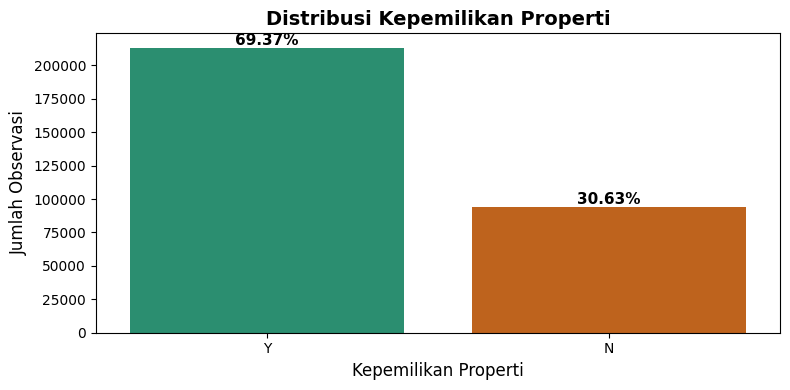

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='FLAG_OWN_REALTY', data=train, palette='Dark2', hue='FLAG_OWN_REALTY', legend=False)

total = len(train)

for p in plt.gca().patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    plt.gca().annotate(percentage, (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Distribusi Kepemilikan Properti', fontsize=14, fontweight='bold')
plt.xlabel('Kepemilikan Properti', fontsize=12)
plt.ylabel('Jumlah Observasi', fontsize=12)
plt.tight_layout()
plt.show()


Dari visualisasi distribusi kepemilikan properti di antara populasi peminjam, kita dapatkan:

- **69.37%** dari total peminjam memiliki properti (ditandai dengan Y).

- **30.63%** sisanya tidak memiliki properti (ditandai dengan N).

Data ini menunjukkan bahwa hampir 7 dari 10 peminjam memiliki properti (Y = 69.37%), sementara 3 dari 10 tidak (N = 30.63%). Ini mencerminkan kondisi ekonomi yang relatif stabil pada sebagian besar populasi.



# **2. Menghapus Data yang Hilang**

**Langkah :**
1.   Identifikasi Data Hilang
2.   Penghapusan Data
3.   Imputasi Data
4.   Penghapusan Redundansi  
5.   Optimasi Data
.   Validasi Akhir

In [ ]:
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# train.info()

# Create a DataFrame of column names and dtypes
dtype_df = pd.DataFrame({
    'Column': train.columns,
    'Data Type': train.dtypes.values
})
# print(dtype_df)

# Temporarily set options for one output
with pd.option_context('display.max_rows', 1000, 'display.width', 1000):
    print(dtype_df)

                           Column Data Type
0                      SK_ID_CURR     int64
1                          TARGET     int64
2              NAME_CONTRACT_TYPE    object
3                     CODE_GENDER    object
4                    FLAG_OWN_CAR    object
5                 FLAG_OWN_REALTY    object
6                    CNT_CHILDREN     int64
7                AMT_INCOME_TOTAL   float64
8                      AMT_CREDIT   float64
9                     AMT_ANNUITY   float64
10                AMT_GOODS_PRICE   float64
11                NAME_TYPE_SUITE    object
12               NAME_INCOME_TYPE    object
13            NAME_EDUCATION_TYPE    object
14             NAME_FAMILY_STATUS    object
15              NAME_HOUSING_TYPE    object
16     REGION_POPULATION_RELATIVE   float64
17                     DAYS_BIRTH     int64
18                  DAYS_EMPLOYED     int64
19              DAYS_REGISTRATION   float64
20                DAYS_ID_PUBLISH     int64
21                    OWN_CAR_AG

Datanya dioptimalkan dengan menurunkan format integer atau float secara otomatis sesuai kebutuhan, sehingga penggunaan memori lebih efisien tanpa mengubah isi data.

In [ ]:
# Select only numeric columns (int64 and float64)
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns

# Downcast numeric columns
train[numeric_cols] = train[numeric_cols].apply(
    pd.to_numeric, downcast='integer'
)

# For float columns (separate step to avoid mixing types)
float_cols = train.select_dtypes(include=['float64']).columns
train[float_cols] = train[float_cols].apply(
    pd.to_numeric, downcast='float'
)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float32(64), float64(1), int16(2), int32(2), int8(37), object(16)
memory usage: 129.3+ MB


Lakukan langkah yang sama dengan dataset sebelumnya, yaitu, melakukan pengecekan missing values beserta persentasenya.

In [ ]:
def missing_val(df):
    missing_count = df.isnull().sum()
    print("Missing values per column:")
    print(missing_count)

    # Calculate percentage of missing values
    missing_percentage = (df.isnull().mean() * 100).round(2)
    print("\nPercentage of missing values per column (%):")
    print(missing_percentage)

    # Create a summary DataFrame
    missing_summary = pd.DataFrame({
        'Missing_Count': missing_count,
        'Missing_Percentage (%)': missing_percentage
    })
    print("\nMissing Values Summary:")
    print(missing_summary)
    return missing_summary

In [ ]:
missing_summary = missing_val(train)
missing_summary

Missing values per column:
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

Percentage of missing values per column (%):
SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

Missing Values Summary:
                            Missing_Count  Missing_Percentage (%)
S

,Missing_Count,Missing_Percentage (%)
SK_ID_CURR,0,0.0
TARGET,0,0.0
NAME_CONTRACT_TYPE,0,0.0
CODE_GENDER,0,0.0
FLAG_OWN_CAR,0,0.0
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5


Melakukan pengecekan missing values yang melebihi 51%.

In [ ]:
missing_summary[missing_summary['Missing_Percentage (%)'] >= 51]

,Missing_Count,Missing_Percentage (%)
OWN_CAR_AGE,202929,65.99
EXT_SOURCE_1,173378,56.38
BASEMENTAREA_AVG,179943,58.52
YEARS_BUILD_AVG,204488,66.50
COMMONAREA_AVG,214865,69.87
ELEVATORS_AVG,163891,53.30
FLOORSMIN_AVG,208642,67.85
LANDAREA_AVG,182590,59.38
LIVINGAPARTMENTS_AVG,210199,68.35
NONLIVINGAPARTMENTS_AVG,213514,69.43


In [ ]:
# Get column names with ≥51% missing values
columns_to_drop = missing_summary[missing_summary['Missing_Percentage (%)'] >= 51].index.tolist()

Melakukan pengecekan korelasi antar kolom yang memiliki missing values.










<Axes: >

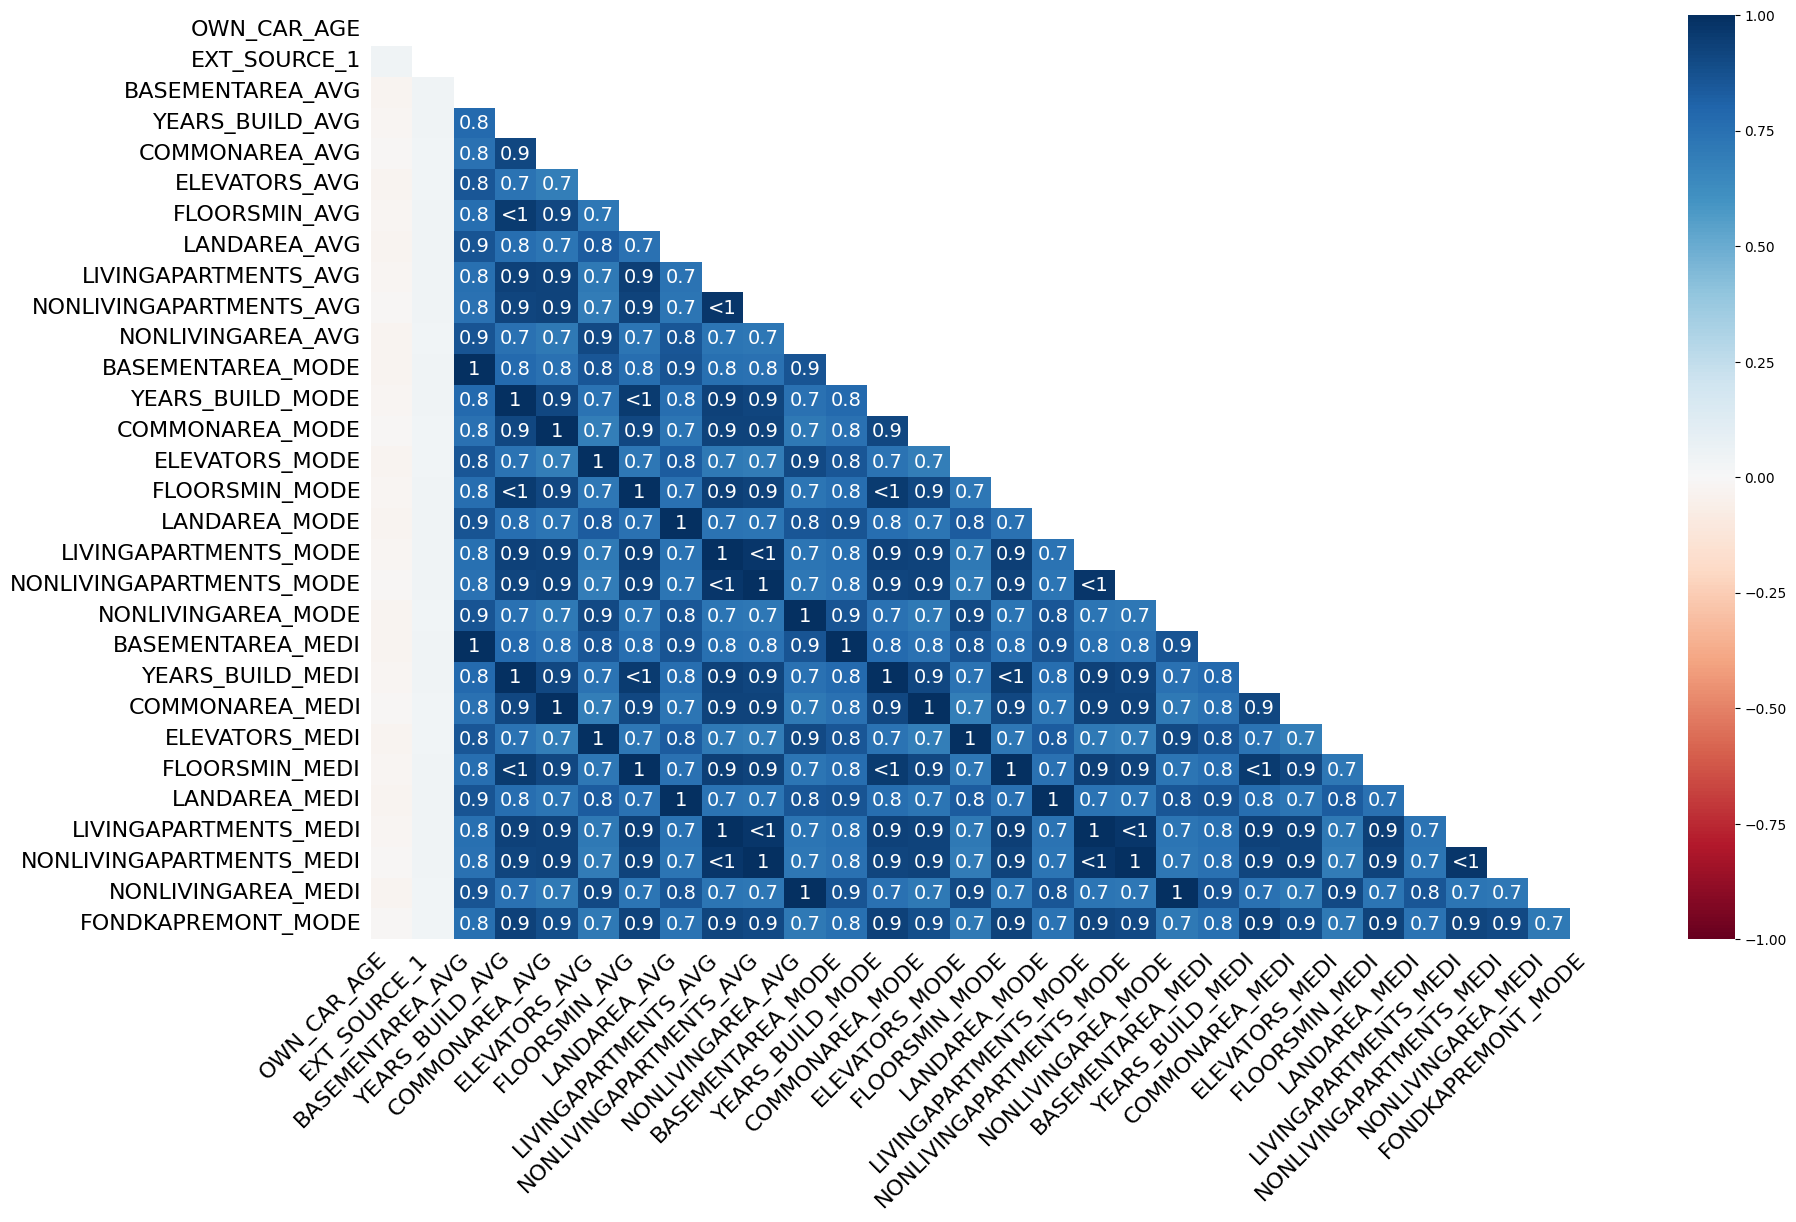

In [ ]:
# Visualize missing value patterns
msno.heatmap(train[columns_to_drop])

Lakukan pairing

In [ ]:
# Calculate pairwise missingness correlations
missing_corr = train.isnull().corr()

# Get column pairs where missingness correlation = 1
perfect_pairs = []
cols = missing_corr.columns

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):  # Avoid duplicates and self-comparison
        if missing_corr.iloc[i, j] == 1.0:
            perfect_pairs.append((cols[i], cols[j]))

# Print results
print("Columns always missing together (heatmap=1):")
for pair in perfect_pairs:
    print(f"- {pair[0]} ↔ {pair[1]}")

Columns always missing together (heatmap=1):
- APARTMENTS_AVG ↔ APARTMENTS_MODE
- APARTMENTS_AVG ↔ APARTMENTS_MEDI
- BASEMENTAREA_AVG ↔ BASEMENTAREA_MODE
- BASEMENTAREA_AVG ↔ BASEMENTAREA_MEDI
- YEARS_BEGINEXPLUATATION_AVG ↔ YEARS_BEGINEXPLUATATION_MODE
- YEARS_BEGINEXPLUATATION_AVG ↔ YEARS_BEGINEXPLUATATION_MEDI
- YEARS_BUILD_AVG ↔ YEARS_BUILD_MODE
- YEARS_BUILD_AVG ↔ YEARS_BUILD_MEDI
- COMMONAREA_AVG ↔ COMMONAREA_MODE
- COMMONAREA_AVG ↔ COMMONAREA_MEDI
- ELEVATORS_AVG ↔ ELEVATORS_MODE
- ELEVATORS_AVG ↔ ELEVATORS_MEDI
- ENTRANCES_AVG ↔ ENTRANCES_MODE
- ENTRANCES_AVG ↔ ENTRANCES_MEDI
- FLOORSMAX_AVG ↔ FLOORSMAX_MODE
- FLOORSMAX_AVG ↔ FLOORSMAX_MEDI
- FLOORSMIN_AVG ↔ FLOORSMIN_MODE
- FLOORSMIN_AVG ↔ FLOORSMIN_MEDI
- LANDAREA_AVG ↔ LANDAREA_MODE
- LANDAREA_AVG ↔ LANDAREA_MEDI
- LIVINGAPARTMENTS_AVG ↔ LIVINGAPARTMENTS_MODE
- LIVINGAPARTMENTS_AVG ↔ LIVINGAPARTMENTS_MEDI
- LIVINGAREA_AVG ↔ LIVINGAREA_MODE
- LIVINGAREA_AVG ↔ LIVINGAREA_MEDI
- NONLIVINGAPARTMENTS_AVG ↔ NONLIVINGAPARTMENTS_MOD

Di construct juga berdasarkan graph. Graph ini digunakan untuk mengidentifikasi pola keterkaitan antar kolom yang memiliki nilai yang hilang, sehingga dapat membantu dalam pengambilan keputusan terkait imputasi atau penghapusan data.

In [ ]:
# Build a graph of perfect correlations
G = Graph()
G.add_edges_from(perfect_pairs)

# Find connected components (groups)
redundant_groups = list(nx.connected_components(G))
print("\nRedundant column groups (drop all but one per group):")
for group in redundant_groups:
    print(f"- {list(group)}")


Redundant column groups (drop all but one per group):
- ['APARTMENTS_AVG', 'APARTMENTS_MODE', 'APARTMENTS_MEDI']
- ['BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE']
- ['YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI']
- ['YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG']
- ['COMMONAREA_MEDI', 'COMMONAREA_MODE', 'COMMONAREA_AVG']
- ['ELEVATORS_MODE', 'ELEVATORS_MEDI', 'ELEVATORS_AVG']
- ['ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE']
- ['FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG']
- ['FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE']
- ['LANDAREA_AVG', 'LANDAREA_MEDI', 'LANDAREA_MODE']
- ['LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG']
- ['LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'LIVINGAREA_AVG']
- ['NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE']
- ['NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI']
- ['DEF_60_CNT_SOCIAL_CIRCLE', 'DEF

In [ ]:
# Keep the FIRST column in each group and drop the rest
columns_to_keep = [list(group)[0] for group in redundant_groups]
columns_to_drop = [
    col
    for group in redundant_groups
    for col in list(group)[1:]  # Exclude the first column
]

print("Columns to KEEP (first in each group):", columns_to_keep)
print("Columns to DROP (redundant):", columns_to_drop)

Columns to KEEP (first in each group): ['APARTMENTS_AVG', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MODE', 'ENTRANCES_MEDI', 'FLOORSMAX_MODE', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MODE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_QRT']
Columns to DROP (redundant): ['APARTMENTS_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'COMMONAREA_MODE', 'COMMONAREA_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'DEF_

Pada setiap graph, hanya kolom pertama yang dipertahankan, sementara kolom lainnya dihapus karena bersifat redundan.

In [ ]:
df_application_train_clean = train.drop(columns=columns_to_drop)
print(f"New shape: {df_application_train_clean.shape} (dropped {len(columns_to_drop)} columns)")

New shape: (307511, 86) (dropped 36 columns)


In [ ]:
missing_summary = missing_val(df_application_train_clean)
missing_summary[missing_summary['Missing_Percentage (%)'] >= 51].index.tolist()

Missing values per column:
SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                             ...  
FLAG_DOCUMENT_18                 0
FLAG_DOCUMENT_19                 0
FLAG_DOCUMENT_20                 0
FLAG_DOCUMENT_21                 0
AMT_REQ_CREDIT_BUREAU_QRT    41519
Length: 86, dtype: int64

Percentage of missing values per column (%):
SK_ID_CURR                    0.0
TARGET                        0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
                             ... 
FLAG_DOCUMENT_18              0.0
FLAG_DOCUMENT_19              0.0
FLAG_DOCUMENT_20              0.0
FLAG_DOCUMENT_21              0.0
AMT_REQ_CREDIT_BUREAU_QRT    13.5
Length: 86, dtype: float64

Missing Values Summary:
                           Missing_Count  Missing_Percentage (%)
SK_ID_CURR                

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'ELEVATORS_MODE',
 'LIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE']

Sisa missing values yang mencapai atau melebihi 51% akan langsung dicoba diimputasi menggunakan median atau mode.

In [ ]:
columns_high_missing = missing_summary[missing_summary['Missing_Percentage (%)'] >= 51].index.tolist()
columns_high_missing

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'ELEVATORS_MODE',
 'LIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE']

In [ ]:
def impute_missing(df_, columns_to_impute):
    # Separate numerical and categorical columns
    num_cols = df_[columns_to_impute].select_dtypes(include=['number']).columns
    cat_cols = df_[columns_to_impute].select_dtypes(include=['object', 'category']).columns

    # Impute numerical (median) and categorical (mode)
    df_[num_cols] = df_[num_cols].fillna(df_[num_cols].median())
    for col in cat_cols:
        df_[col] = df_[col].fillna(df_[col].mode()[0])

    return df_application_train_clean

# Usage
df_application_train_clean = impute_missing(df_application_train_clean, columns_to_impute=columns_high_missing)

In [ ]:
missing_summary = missing_val(df_application_train_clean)
missing_summary[missing_summary['Missing_Percentage (%)'] > 0]

Missing values per column:
SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                             ...  
FLAG_DOCUMENT_18                 0
FLAG_DOCUMENT_19                 0
FLAG_DOCUMENT_20                 0
FLAG_DOCUMENT_21                 0
AMT_REQ_CREDIT_BUREAU_QRT    41519
Length: 86, dtype: int64

Percentage of missing values per column (%):
SK_ID_CURR                    0.0
TARGET                        0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
                             ... 
FLAG_DOCUMENT_18              0.0
FLAG_DOCUMENT_19              0.0
FLAG_DOCUMENT_20              0.0
FLAG_DOCUMENT_21              0.0
AMT_REQ_CREDIT_BUREAU_QRT    13.5
Length: 86, dtype: float64

Missing Values Summary:
                           Missing_Count  Missing_Percentage (%)
SK_ID_CURR                

,Missing_Count,Missing_Percentage (%)
AMT_GOODS_PRICE,278,0.09
NAME_TYPE_SUITE,1292,0.42
OCCUPATION_TYPE,96391,31.35
EXT_SOURCE_2,660,0.21
EXT_SOURCE_3,60965,19.83
APARTMENTS_AVG,156061,50.75
YEARS_BEGINEXPLUATATION_MODE,150007,48.78
FLOORSMAX_MODE,153020,49.76
ENTRANCES_MEDI,154828,50.35
LIVINGAREA_MEDI,154350,50.19


Missing values lainnya juga diperiksa korelasinya seperti yang telah dilakukan sebelumnya.

In [ ]:
rest_missing = missing_summary[missing_summary['Missing_Count'] > 0].index.tolist()

<Axes: >

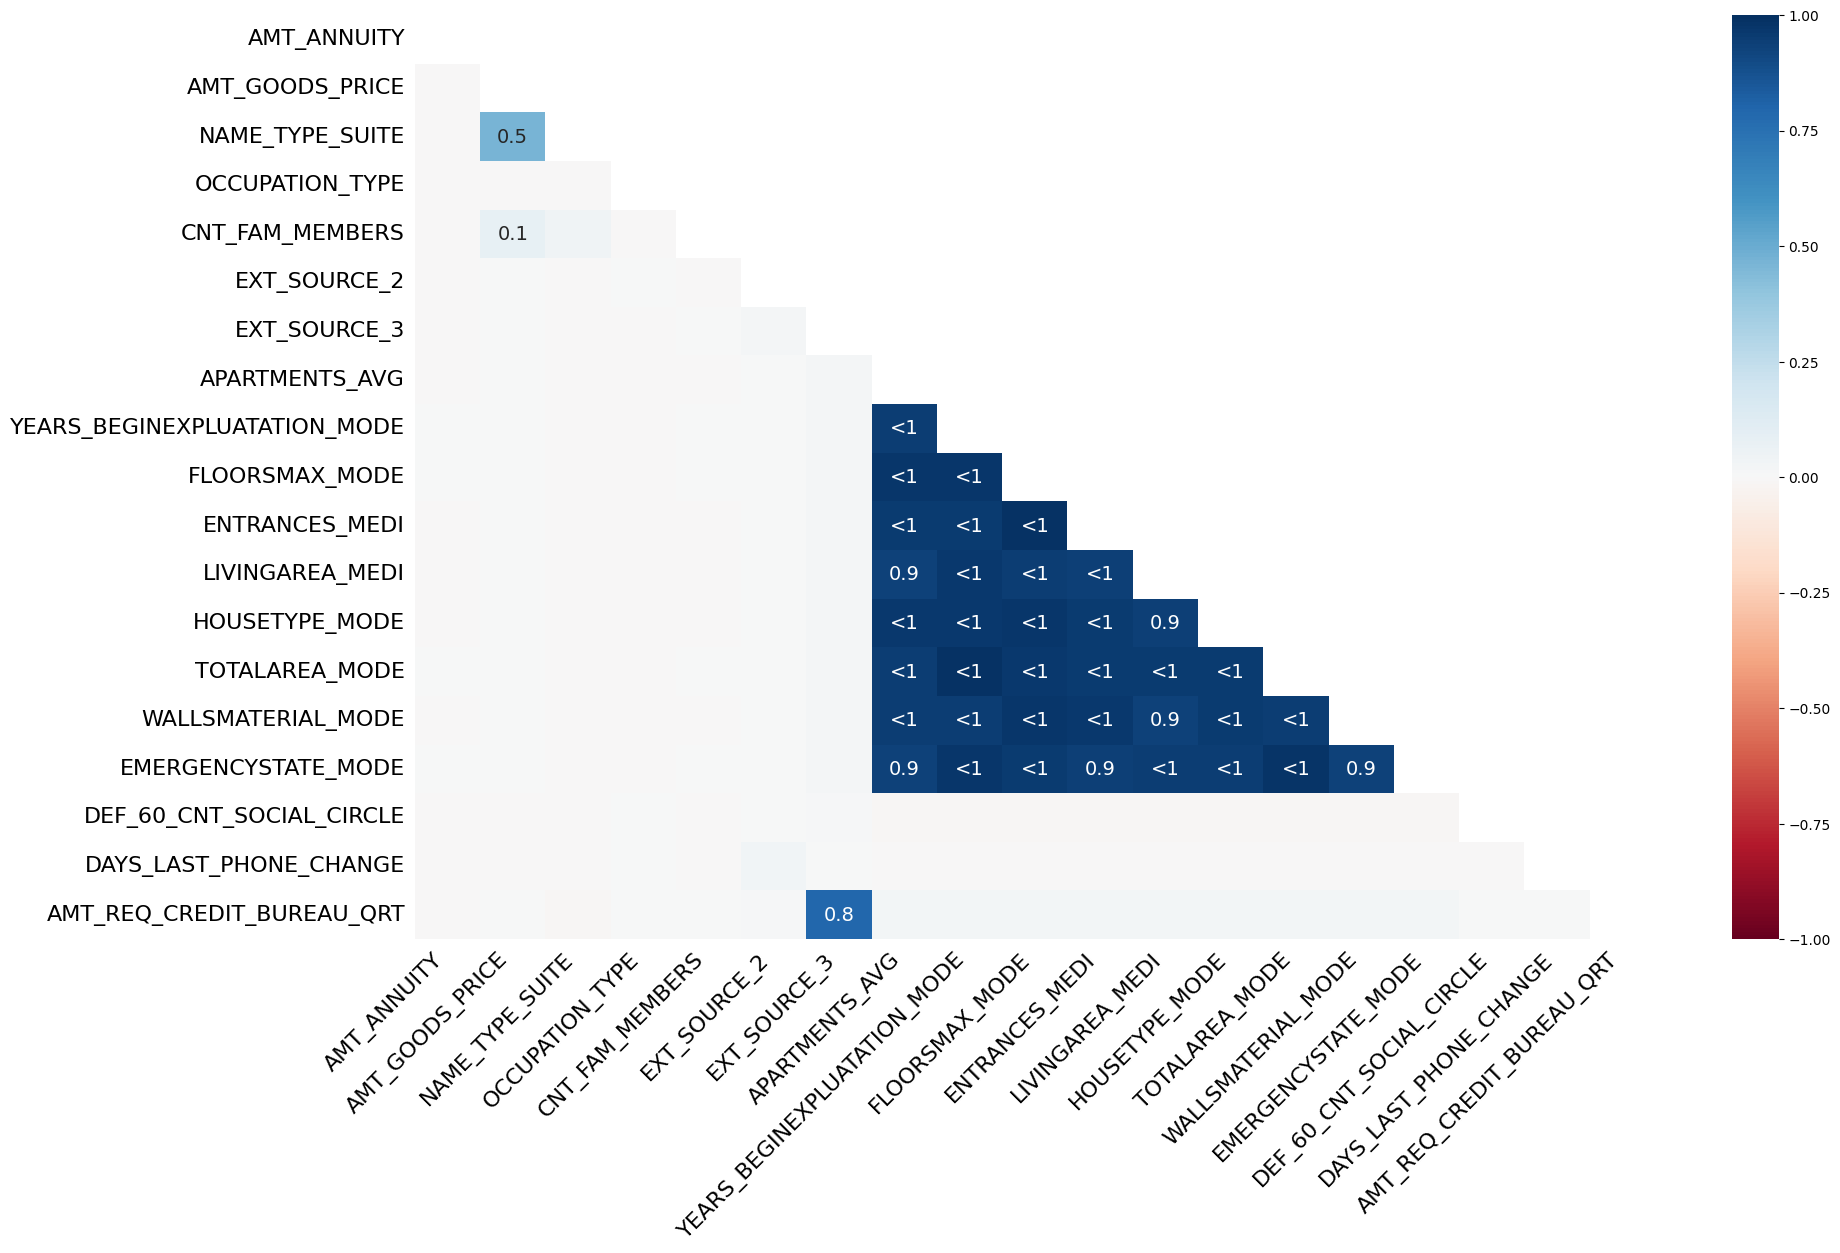

In [ ]:
# Visualize missing value patterns
msno.heatmap(train[rest_missing])

Karena tidak ada yang bernilai 1, maka kolom tersebut tetap dipertahankan dan langsung dilakukan imputasi.

In [ ]:
df_application_train_clean = impute_missing(df_application_train_clean, columns_to_impute=rest_missing)

In [ ]:
missing_summary = missing_val(df_application_train_clean)
missing_summary[missing_summary['Missing_Percentage (%)'] > 0]

Missing values per column:
SK_ID_CURR                   0
TARGET                       0
NAME_CONTRACT_TYPE           0
CODE_GENDER                  0
FLAG_OWN_CAR                 0
                            ..
FLAG_DOCUMENT_18             0
FLAG_DOCUMENT_19             0
FLAG_DOCUMENT_20             0
FLAG_DOCUMENT_21             0
AMT_REQ_CREDIT_BUREAU_QRT    0
Length: 86, dtype: int64

Percentage of missing values per column (%):
SK_ID_CURR                   0.0
TARGET                       0.0
NAME_CONTRACT_TYPE           0.0
CODE_GENDER                  0.0
FLAG_OWN_CAR                 0.0
                            ... 
FLAG_DOCUMENT_18             0.0
FLAG_DOCUMENT_19             0.0
FLAG_DOCUMENT_20             0.0
FLAG_DOCUMENT_21             0.0
AMT_REQ_CREDIT_BUREAU_QRT    0.0
Length: 86, dtype: float64

Missing Values Summary:
                           Missing_Count  Missing_Percentage (%)
SK_ID_CURR                             0                     0.0
TARGET          

,Missing_Count,Missing_Percentage (%)


Untuk menghemat format

In [ ]:
# Select only numeric columns (int64 and float64)
numeric_cols = df_installments_payments.select_dtypes(include=['int64', 'float64']).columns

# Downcast numeric columns
df_installments_payments[numeric_cols] = df_installments_payments[numeric_cols].apply(
    pd.to_numeric, downcast='integer'
)

# For float columns (separate step to avoid mixing types)
float_cols = df_installments_payments.select_dtypes(include=['float64']).columns
df_installments_payments[float_cols] = df_installments_payments[float_cols].apply(
    pd.to_numeric, downcast='float'
)

In [ ]:
df_installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int32  
 1   SK_ID_CURR              int32  
 2   NUM_INSTALMENT_VERSION  int16  
 3   NUM_INSTALMENT_NUMBER   int16  
 4   DAYS_INSTALMENT         int16  
 5   DAYS_ENTRY_PAYMENT      float32
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float32(1), float64(2), int16(3), int32(2)
memory usage: 441.2 MB


In [ ]:
df_installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1,6,-1180,-1187.0,6948.360,6948.360
1,1330831,151639,0,34,-2156,-2156.0,1716.525,1716.525
2,2085231,193053,2,1,-63,-63.0,25425.000,25425.000
3,2452527,199697,1,3,-2418,-2426.0,24350.130,24350.130
4,2714724,167756,1,2,-1383,-1366.0,2165.040,2160.585


# **Periksa missing values**

In [ ]:
missing_summary = missing_val(df_installments_payments)
missing_summary[missing_summary['Missing_Percentage (%)'] > 0]

Missing values per column:
SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

Percentage of missing values per column (%):
SK_ID_PREV                0.00
SK_ID_CURR                0.00
NUM_INSTALMENT_VERSION    0.00
NUM_INSTALMENT_NUMBER     0.00
DAYS_INSTALMENT           0.00
DAYS_ENTRY_PAYMENT        0.02
AMT_INSTALMENT            0.00
AMT_PAYMENT               0.02
dtype: float64

Missing Values Summary:
                        Missing_Count  Missing_Percentage (%)
SK_ID_PREV                          0                    0.00
SK_ID_CURR                          0                    0.00
NUM_INSTALMENT_VERSION              0                    0.00
NUM_INSTALMENT_NUMBER               0                    0.00
DAYS_INSTALMENT                     0                    0.00
DAYS_E

,Missing_Count,Missing_Percentage (%)
DAYS_ENTRY_PAYMENT,2905,0.02
AMT_PAYMENT,2905,0.02


In [ ]:
df_installments_payments[df_installments_payments['DAYS_ENTRY_PAYMENT'].isnull()]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
3764207,1531600,103793,1,7,-668,NaN,49741.020,NaN
3764208,1947105,159974,1,24,-36,NaN,22849.515,NaN
3764209,1843773,167270,1,22,-20,NaN,48092.355,NaN
3764210,1691592,192536,1,5,-2561,NaN,7675.425,NaN
3764211,1531299,157088,0,11,-1847,NaN,67.500,NaN
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0,66,-1624,NaN,67.500,NaN
13605397,1310347,414406,0,47,-1539,NaN,67.500,NaN
13605398,1308766,402199,0,43,-7,NaN,43737.435,NaN
13605399,1062206,409297,0,43,-1986,NaN,67.500,NaN


In [ ]:
# Get columns where missing percentage < 10%
low_missing_cols = missing_summary[missing_summary['Missing_Count'] > 0].index.tolist()
print("Columns with >0 missing values:", low_missing_cols)

Columns with >0 missing values: ['DAYS_ENTRY_PAYMENT', 'AMT_PAYMENT']


Missing value-nya tidak signifikan. Langsung drop

In [ ]:
df_installments_payments_clean = df_installments_payments.dropna(subset=low_missing_cols)
print(f"New DataFrame shape: {df_installments_payments_clean.shape}")

New DataFrame shape: (13602496, 8)


In [ ]:
df_installments_payments_clean

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1,6,-1180,-1187.0,6948.360,6948.360
1,1330831,151639,0,34,-2156,-2156.0,1716.525,1716.525
2,2085231,193053,2,1,-63,-63.0,25425.000,25425.000
3,2452527,199697,1,3,-2418,-2426.0,24350.130,24350.130
4,2714724,167756,1,2,-1383,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605344,2006721,442291,1,3,-1311,-1318.0,2934.225,2934.225
13605345,1126000,428449,0,12,-301,-302.0,6793.470,6750.000
13605346,1519070,444122,1,5,-399,-407.0,4363.830,4363.830
13605347,2784672,444977,0,4,-157,-157.0,373.005,373.005


In [ ]:
df_application_train_clean

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_QRT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0,0,0,0,0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0,0,0,0,0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,0,0,0,0,0,0.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0,0,0,0,0,0.0


 3. Transformasi dan Rekayasa Fitur untuk Kedua Dataset

In [ ]:
import pandas as pd
# import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

Kode di atas mengimpor pustaka yang diperlukan untuk tahap transformasi dan rekayasa fitur pada dataset Lending Club Loan. Pustaka pandas digunakan untuk manipulasi data, sedangkan LabelEncoder dari sklearn.preprocessing akan digunakan untuk mengubah data kategorikal menjadi bentuk numerik.

**3.1 Fitur Downcasting guna menurunkan penggunaan memori dengan menyesuaikan tipe data seefisien mungkin sesuai kebutuhan**

In [ ]:
def downcasting(df):
    # Select only numeric columns (int64 and float64)
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

    # Downcast numeric columns
    df[numeric_cols] = df[numeric_cols].apply(
        pd.to_numeric, downcast='integer'
    )

    # For float columns (separate step to avoid mixing types)
    float_cols = df.select_dtypes(include=['float64']).columns
    df[float_cols] = df[float_cols].apply(
        pd.to_numeric, downcast='float'
    )

    return df

Fungsi downcasting(df) bertujuan untuk mengurangi penggunaan memori dataset dengan mengonversi kolom numerik ke tipe data yang lebih kecil tanpa mengubah nilai aslinya.

Fungsi pertama-tama memilih kolom dengan tipe data int64 dan float64 menggunakan select_dtypes(include=['int64', 'float64']). Hal ini memastikan hanya kolom numerik yang akan diproses, sehingga menghindari kesalahan dalam manipulasi tipe data.

Downcasting Kolom Integer

Kolom dengan tipe int64 dikonversi ke tipe integer yang lebih kecil (int32 atau int16, bergantung pada rentang nilainya) menggunakan pd.to_numeric(downcast='integer'). Konversi ini membantu menghemat penggunaan memori tanpa kehilangan presisi pada nilai integer.
Downcasting Kolom Float

Kolom bertipe float64 diproses dalam langkah terpisah untuk memastikan tidak terjadi pencampuran tipe data. Kolom ini dikonversi ke tipe float yang lebih kecil (float32 atau float16) menggunakan pd.to_numeric(downcast='float'), yang mengurangi konsumsi memori tetapi tetap mempertahankan akurasi dalam representasi angka desimal.
Mengembalikan DataFrame yang Sudah Dioptimalkan

Setelah semua kolom numerik berhasil dikonversi, fungsi mengembalikan dataset dengan tipe data yang telah di-downcast.

In [ ]:
df_application_train_clean = downcasting(df_application_train_clean)
df_installments_payments_clean = downcasting(df_installments_payments_clean)

C:\Users\TUF A15\AppData\Local\Temp\ipykernel_22704\662294225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = df[numeric_cols].apply(
C:\Users\TUF A15\AppData\Local\Temp\ipykernel_22704\662294225.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[float_cols] = df[float_cols].apply(


Kode di atas menjalankan fungsi downcasting() pada dua DataFrame, yaitu df_accepted_clean dan df_rejected_clean, untuk mengoptimalkan penggunaan memori dengan mengonversi tipe data numerik menjadi tipe yang lebih kecil.

In [ ]:
df_application_train_clean

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_QRT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0,0,0,0,0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0,0,0,0,0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,0,0,0,0,0,0.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0,0,0,0,0,0.0


Melakukan proses filtering untuk memusatkan fokus kerja pada kolom atau variabel yang bertipe data "object" atau "categorical"

In [ ]:
# Method 1: Using select_dtypes()
df_application_train_categorical = df_application_train_clean.select_dtypes(include=['object', 'category'])

Selanjutnya, tiap kolom yang bertipe data categorical/object di analisis berapa banyak unique values di dalamnya sebagai informasi dan analisa untuk kebutuhan lanjutan

In [ ]:
cat_cols_application_train = df_application_train_categorical.columns

for col in cat_cols_application_train:
    num_categories = df_application_train_categorical[col].nunique()
    print(f"'{col}': {num_categories} categories")

'NAME_CONTRACT_TYPE': 2 categories
'CODE_GENDER': 3 categories
'FLAG_OWN_CAR': 2 categories
'FLAG_OWN_REALTY': 2 categories
'NAME_TYPE_SUITE': 7 categories
'NAME_INCOME_TYPE': 8 categories
'NAME_EDUCATION_TYPE': 5 categories
'NAME_FAMILY_STATUS': 6 categories
'NAME_HOUSING_TYPE': 6 categories
'OCCUPATION_TYPE': 18 categories
'WEEKDAY_APPR_PROCESS_START': 7 categories
'ORGANIZATION_TYPE': 58 categories
'FONDKAPREMONT_MODE': 4 categories
'HOUSETYPE_MODE': 3 categories
'WALLSMATERIAL_MODE': 7 categories
'EMERGENCYSTATE_MODE': 2 categories


3.3 Membuat function yang berisikan metode Label Encoder

In [ ]:
def labelEncoding(df, col):
    # Create a LabelEncoder instance
    le = LabelEncoder()

    # Fit and transform the column
    df[col] = le.fit_transform(df[col])

    return df

Membuat looping berdasarkan kolom/variabel yang telah disaring sesuai tipe data yang difokuskan yaitu object/categorical

In [ ]:
for col in cat_cols_application_train:
    print(col)
    df_application_train_clean= labelEncoding(df_application_train_clean, col)
    df_application_train_clean.drop(columns=[col], inplace=True)

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE


Ditampilkan kolom kolom apa saja yang memiliki jenis data kategorikal

In [ ]:
df_application_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 70 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int32  
 1   TARGET                        307511 non-null  int8   
 2   CNT_CHILDREN                  307511 non-null  int8   
 3   AMT_INCOME_TOTAL              307511 non-null  float64
 4   AMT_CREDIT                    307511 non-null  float32
 5   AMT_ANNUITY                   307511 non-null  float32
 6   AMT_GOODS_PRICE               307511 non-null  float32
 7   REGION_POPULATION_RELATIVE    307511 non-null  float32
 8   DAYS_BIRTH                    307511 non-null  int16  
 9   DAYS_EMPLOYED                 307511 non-null  int32  
 10  DAYS_REGISTRATION             307511 non-null  float32
 11  DAYS_ID_PUBLISH               307511 non-null  int16  
 12  OWN_CAR_AGE                   307511 non-nul

Data sudah bersih dan rapih serta sudah dalam bentuk numerikal tidak ada yang masih dalam bentuk kategorikal


[Cleaned]installments_payments.csv

In [ ]:
df_installments_payments_clean

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1,6,-1180,-1187.0,6948.360,6948.360
1,1330831,151639,0,34,-2156,-2156.0,1716.525,1716.525
2,2085231,193053,2,1,-63,-63.0,25425.000,25425.000
3,2452527,199697,1,3,-2418,-2426.0,24350.130,24350.130
4,2714724,167756,1,2,-1383,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605344,2006721,442291,1,3,-1311,-1318.0,2934.225,2934.225
13605345,1126000,428449,0,12,-301,-302.0,6793.470,6750.000
13605346,1519070,444122,1,5,-399,-407.0,4363.830,4363.830
13605347,2784672,444977,0,4,-157,-157.0,373.005,373.005


Menampilkan isi dari DataFrame df_installments_payments_clean.


In [ ]:
df_installments_payments_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13602496 entries, 0 to 13605348
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int32  
 1   SK_ID_CURR              int32  
 2   NUM_INSTALMENT_VERSION  int16  
 3   NUM_INSTALMENT_NUMBER   int16  
 4   DAYS_INSTALMENT         int16  
 5   DAYS_ENTRY_PAYMENT      float32
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float32(1), float64(2), int16(3), int32(2)
memory usage: 544.8 MB


Semua data sudah pada format numerikal. tidak perlu transformasi/normalisasi lebih lanjut

In [ ]:
df_application_train_clean.to_csv('[FeatureEngineered]application_train.csv', index=False)
df_installments_payments_clean.to_csv('[FeatureEngineered]installments_payments.csv', index=False)

Tahap Transformasi dan Rekayasa Fitur telah selesai, dan hasilnya disimpan dalam dua file CSV:

- [FeatureEngineered]application_train.csv – Berisi data pemohon yang diterima dengan fitur yang telah direkayasa.

- [FeatureEngineered]installments_payments.csv – Berisi data pemohon yang ditolak dengan fitur yang telah dibersihkan dan direkayasa.

# Anggota ke-4: Analisis Ketidakseimbangan Kelas dan Perbandingan Metode Prapemrosesan untuk Kedua Dataset

# Aplication_Train

Hasil analisis dari kode dibawah :
Berdasarkan hasil analisis pada dataset Application Train, distribusi kelas dalam variabel target yaitu AMT_CREDIT menunjukkan keseimbangan yang baik. Hal ini ditunjukkan oleh nilai skewness dan kurtosis yang berada dalam rentang yang wajar, menandakan bahwa distribusi data tidak terlalu condong ke satu sisi (asimetri rendah) dan tidak memiliki ekor yang terlalu berat. Dengan demikian, tidak diperlukan teknik penyeimbangan data seperti SMOTE, class weighting, atau undersampling/oversampling. Kondisi ini mengindikasikan bahwa dataset sudah siap digunakan untuk proses prediksi tanpa perlu penyesuaian lebih lanjut terhadap distribusi kelas.

In [ ]:
def downcasting(df):
    # Select only numeric columns (int64 and float64)
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

    # Downcast numeric columns
    df[numeric_cols] = df[numeric_cols].apply(
        pd.to_numeric, downcast='integer'
    )

    # For float columns (separate step to avoid mixing types)
    float_cols = df.select_dtypes(include=['float64']).columns
    df[float_cols] = df[float_cols].apply(
        pd.to_numeric, downcast='float'
    )

    return df

In [ ]:
df_application_train = downcasting(df_application_train_clean)

In [ ]:
df_application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 70 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int32  
 1   TARGET                        307511 non-null  int8   
 2   CNT_CHILDREN                  307511 non-null  int8   
 3   AMT_INCOME_TOTAL              307511 non-null  float64
 4   AMT_CREDIT                    307511 non-null  float32
 5   AMT_ANNUITY                   307511 non-null  float32
 6   AMT_GOODS_PRICE               307511 non-null  float32
 7   REGION_POPULATION_RELATIVE    307511 non-null  float32
 8   DAYS_BIRTH                    307511 non-null  int16  
 9   DAYS_EMPLOYED                 307511 non-null  int32  
 10  DAYS_REGISTRATION             307511 non-null  float32
 11  DAYS_ID_PUBLISH               307511 non-null  int16  
 12  OWN_CAR_AGE                   307511 non-nul

In [ ]:
df_application_train['AMT_CREDIT']

0          406597.5
1         1293502.5
2          135000.0
3          312682.5
4          513000.0
            ...    
307506     254700.0
307507     269550.0
307508     677664.0
307509     370107.0
307510     675000.0
Name: AMT_CREDIT, Length: 307511, dtype: float32

In [ ]:
# Take 10% of your data (adjust fraction as needed)
small_df_application_train = df_application_train.sample(frac=0.1, random_state=42)  # random_state for reproducibility

# small_df_rejected.drop('Risk_Score_processed', axis=1)
# small_df_rejected.drop('Risk_Score_scaled', axis=1)
# small_df_rejected.drop('Risk_Scaled', axis=1)

# Proceed with small_df for your experiments
X = df_application_train.drop('AMT_CREDIT', axis=1)
y = df_application_train['AMT_CREDIT']

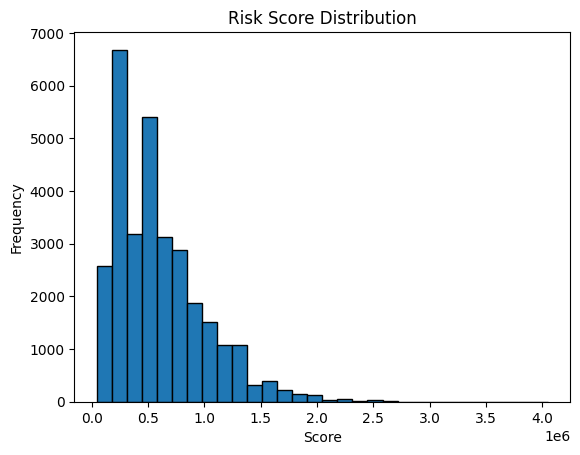

In [ ]:
plt.hist(small_df_application_train['AMT_CREDIT'], bins=30, edgecolor='black')
plt.title("Risk Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Print basic statistics
print("Statistical Summary:")
print(small_df_application_train['AMT_CREDIT'].describe())

# Additional metrics
print("\nSkewness:", round(small_df_application_train['AMT_CREDIT'].skew(), 2))  # Measure of asymmetry
print("Kurtosis:", round(small_df_application_train['AMT_CREDIT'].kurt(), 2))   # Measure of tail heaviness

Statistical Summary:
count    3.075100e+04
mean     5.979197e+05
std      4.023690e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.108535e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

Skewness: 1.29
Kurtosis: 2.34


In [ ]:
df_installments_payments = downcasting(df_installments_payments)

## **Installments_payments**

tidak memiliki variabel yang cocok sebagai target untuk analisis keseimbangan kelas. Semua fitur yang tersedia dalam dataset merupakan variabel numerik yang bersifat kontinu, seperti jumlah cicilan, jumlah pembayaran, dan hari keterlambatan. Keseimbangan kelas umumnya dianalisis pada variabel kategorikal dengan kelas yang jelas, seperti "lulus/gagal" atau "fraud/non-fraud." Karena tidak ada variabel target yang sesuai, analisis ketidakseimbangan kelas tidak dapat diterapkan pada dataset ini.

In [ ]:
df_installments_payments

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1,6,-1180,-1187.0,6948.360,6948.360
1,1330831,151639,0,34,-2156,-2156.0,1716.525,1716.525
2,2085231,193053,2,1,-63,-63.0,25425.000,25425.000
3,2452527,199697,1,3,-2418,-2426.0,24350.130,24350.130
4,2714724,167756,1,2,-1383,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0,66,-1624,NaN,67.500,NaN
13605397,1310347,414406,0,47,-1539,NaN,67.500,NaN
13605398,1308766,402199,0,43,-7,NaN,43737.435,NaN
13605399,1062206,409297,0,43,-1986,NaN,67.500,NaN
